 ### **M3 L5 Análisis de Caso: Data Wrangling en E-commerce**

--- Archivo 'transacciones.csv' de ejemplo creado. ---

--- 1. Carga y Exploración Inicial ---

Datos originales en formato 'ancho':


,TransactionID,Fecha,ClienteID,Producto_1,Producto_2,Producto_3
0,1,2024-06-01,101,Laptop,Mouse,Webcam
1,2,2024-06-01,102,Mouse,Teclado,NaN
2,3,2024-06-02,101,Teclado,NaN,NaN
3,4,2024-06-03,103,Mouse,Monitor,NaN
4,5,2024-06-03,102,Monitor,Webcam,Mouse



Información inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5 non-null      int64 
 1   Fecha          5 non-null      object
 2   ClienteID      5 non-null      int64 
 3   Producto_1     5 non-null      object
 4   Producto_2     4 non-null      object
 5   Producto_3     2 non-null      object
dtypes: int64(2), object(4)
memory usage: 372.0+ bytes

--- 2. Reestructuración a formato 'largo' con melt ---
Datos transformados a formato 'largo':


,TransactionID,Fecha,ClienteID,Variable_Producto,Producto
0,1,2024-06-01,101,Producto_1,Laptop
1,2,2024-06-01,102,Producto_1,Mouse
2,3,2024-06-02,101,Producto_1,Teclado
3,4,2024-06-03,103,Producto_1,Mouse
4,5,2024-06-03,102,Producto_1,Monitor



--- 3. Limpieza y Transformación ---
Datos limpios (filas nulas eliminadas y fecha convertida):


,TransactionID,Fecha,ClienteID,Producto
0,1,2024-06-01,101,Laptop
1,2,2024-06-01,102,Mouse
2,3,2024-06-02,101,Teclado
3,4,2024-06-03,103,Mouse
4,5,2024-06-03,102,Monitor



--- 4. Análisis de Datos ---

Categorías de productos más populares:


Producto
Mouse      4
Teclado    2
Monitor    2
Webcam     2
Laptop     1
Name: count, dtype: int64


--- 5. Visualización y Exportación ---
Se genera un gráfico de barras para visualizar la popularidad de los productos.

DataFrame limpio y transformado guardado como 'transacciones_tidy.csv'.


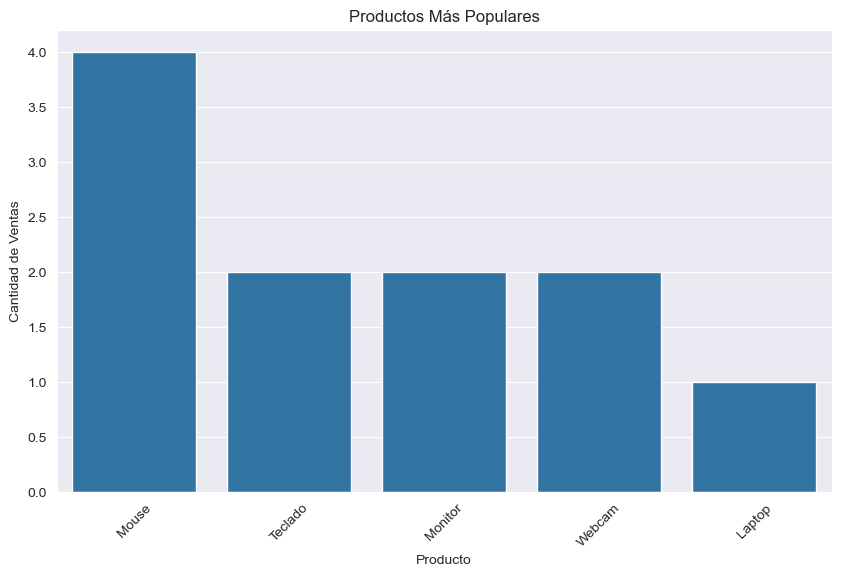

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Simulación del archivo transacciones.csv ---
# Se crea un DataFrame de ejemplo en formato "ancho" para la demostración.
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Fecha': ['2024-06-01', '2024-06-01', '2024-06-02', '2024-06-03', '2024-06-03'],
    'ClienteID': [101, 102, 101, 103, 102],
    'Producto_1': ['Laptop', 'Mouse', 'Teclado', 'Mouse', 'Monitor'],
    'Producto_2': ['Mouse', 'Teclado', np.nan, 'Monitor', 'Webcam'],
    'Producto_3': ['Webcam', np.nan, np.nan, np.nan, 'Mouse']
}
df_ejemplo = pd.DataFrame(data)
df_ejemplo.to_csv('transacciones.csv', index=False)
print("--- Archivo 'transacciones.csv' de ejemplo creado. ---")


# --- Inicio de la Resolución del Caso ---

# 1. Carga y Exploración
print("\n--- 1. Carga y Exploración Inicial ---")
df_wide = pd.read_csv('transacciones.csv')
print("\nDatos originales en formato 'ancho':")
display(df_wide.head())
print("\nInformación inicial:")
df_wide.info()


# 2. Reestructuración de Datos (Wide to Long)
print("\n--- 2. Reestructuración a formato 'largo' con melt ---")
# pd.melt() transforma las columnas de productos en una sola.
df_long = pd.melt(
    df_wide,
    id_vars=['TransactionID', 'Fecha', 'ClienteID'],
    value_vars=['Producto_1', 'Producto_2', 'Producto_3'],
    var_name='Variable_Producto',
    value_name='Producto'
)
print("Datos transformados a formato 'largo':")
display(df_long.head())


# 3. Limpieza y Transformación
print("\n--- 3. Limpieza y Transformación ---")
# Eliminación de filas donde 'Producto' es nulo (NaN), que resultan de transacciones con menos de 3 ítems.
df_limpio = df_long.dropna(subset=['Producto'])
# Eliminación de la columna auxiliar 'Variable_Producto' que ya no es necesaria.
df_limpio = df_limpio.drop(columns='Variable_Producto')

# Convertir la columna 'Fecha' a formato datetime.
df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'])
print("Datos limpios (filas nulas eliminadas y fecha convertida):")
display(df_limpio.head())


# 4. Análisis de Datos
print("\n--- 4. Análisis de Datos ---")
# Calcular la frecuencia de cada producto para encontrar los más populares.
popularidad_productos = df_limpio['Producto'].value_counts()
print("\nCategorías de productos más populares:")
display(popularidad_productos)


# 5. Visualización y Exportación
print("\n--- 5. Visualización y Exportación ---")
# Crear un gráfico de barras para visualizar la popularidad.
plt.figure(figsize=(10, 6))
sns.barplot(x=popularidad_productos.index, y=popularidad_productos.values)
plt.title('Productos Más Populares')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
# En un entorno con GUI, plt.show() mostraría el gráfico.
print("Se genera un gráfico de barras para visualizar la popularidad de los productos.")

# Exportar el DataFrame limpio y largo a un nuevo archivo CSV.
df_limpio.to_csv('transacciones_tidy.csv', index=False)
print("\nDataFrame limpio y transformado guardado como 'transacciones_tidy.csv'.")


## **2. Importancia del Data Wrangling (Formato Tidy)**
El Data Wrangling es el proceso de limpiar y reestructurar datos crudos para hacerlos aptos para el análisis. La transformación realizada en este caso es un ejemplo clásico de cómo pasar de un formato "ancho" a uno "largo" o "tidy" (ordenado).

El principio de los datos ordenados (Tidy Data) establece que cada variable debe ser una columna y cada observación una fila.

* **Formato Ancho (Original):** Violaba este principio porque la variable "producto comprado" estaba distribuida en múltiples columnas (Producto_1, Producto_2, etc.). Esto hace que sea casi imposible realizar agregaciones o contar la frecuencia de los productos de manera directa.

* **Formato Largo (Transformado):** Cumple con el principio. Ahora tenemos una única columna "Producto" que contiene todas las observaciones de esa variable. Este formato es el estándar esperado por la mayoría de las herramientas de análisis y visualización en Python, permitiendo operaciones como groupby() y value_counts() de forma sencilla y eficiente.

## **3. Conclusiones del Análisis**
Gracias a la reestructuración de los datos, la empresa puede obtener información valiosa de manera directa:

* **Identificación de Productos Clave:** El análisis de frecuencia (value_counts()) revela inmediatamente cuáles son los productos más vendidos. En nuestro ejemplo, el "Mouse" fue el producto más popular, lo que sugiere que podría ser un pilar en la estrategia de ventas o marketing.

* **Toma de Decisiones Informada:** Conocer los productos más populares permite a la empresa optimizar su inventario, enfocar campañas de marketing en los artículos de mayor interés y desarrollar estrategias de venta cruzada (cross-selling).

* **Eficiencia Analítica:** El proceso de Data Wrangling, aunque requiere un esfuerzo inicial, crea un conjunto de datos limpio y estructurado que sirve como una base sólida y reutilizable para futuros análisis más complejos (ej. análisis de tendencias temporales, segmentación de clientes, etc.).